## The goal of the Project? 

***Predicting house prices in certain metropolitan areas based in the US.***

### Tree directory for the project:

```
/project
   app.py
   model.py
   model.pkl
   
   /template
      /index.html #home page
   /static
      /img #all images stored in this folder
      /styles #all CSS styles are stored here
```      

**We also need to understand some of the key variables/metrics to observe and study. Using a dataset sourced from Kaggle:**

USA Housing: https://www.kaggle.com/vedavyasv/usa-housing

**The variables to observe are:**

- Average Area Income
- Average Area House Age
- Average Area Number of Rooms
- Average Area Number of Bedrooms
- Area Population
- Price
- Address

>**Firstly, "Address" will not be associated with our analysis as we are basing our predictions on numerical variables.**

The point of the application is to predict the price of houses, hence our response variable will be **"Price"**. As for area income, house age, number of rooms, number of bedrooms and area population, they could influence the price tag of houses dramatically.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading data

In [2]:
usa_housing = pd.read_csv("USA_Housing.csv")

## Let’s now conduct some exploratory analysis into the dataset

In [3]:
usa_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
usa_housing.shape

(5000, 7)

In [5]:
usa_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
usa_housing.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [7]:
usa_housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
usa_housing_num = usa_housing.select_dtypes(include='number')
usa_housing_num.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [10]:
# Creating correlation matrix

corr = usa_housing_num.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


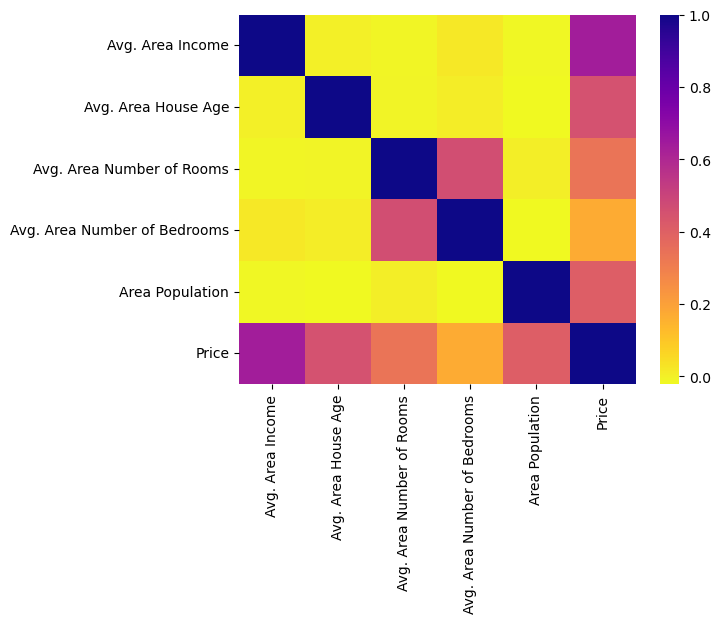

In [11]:
# Creating a heatmap

sns.heatmap(corr,cmap='plasma_r')
plt.show()

Looking at the correlation heat map above, we can see that the majority of the positive responses between all 6 predictor variables occur with the response variable “Price”. Interestingly, there seems to be a positive correlation between Avg. Area Number of Bedrooms and Avg. Area Number of Rooms. We can also observe that the largest correlation is between Avg. Income and Price. This in particular makes sense considering that the quality and value of houses can depend on the average income of the area.

**Let’s now look at some other observations:**

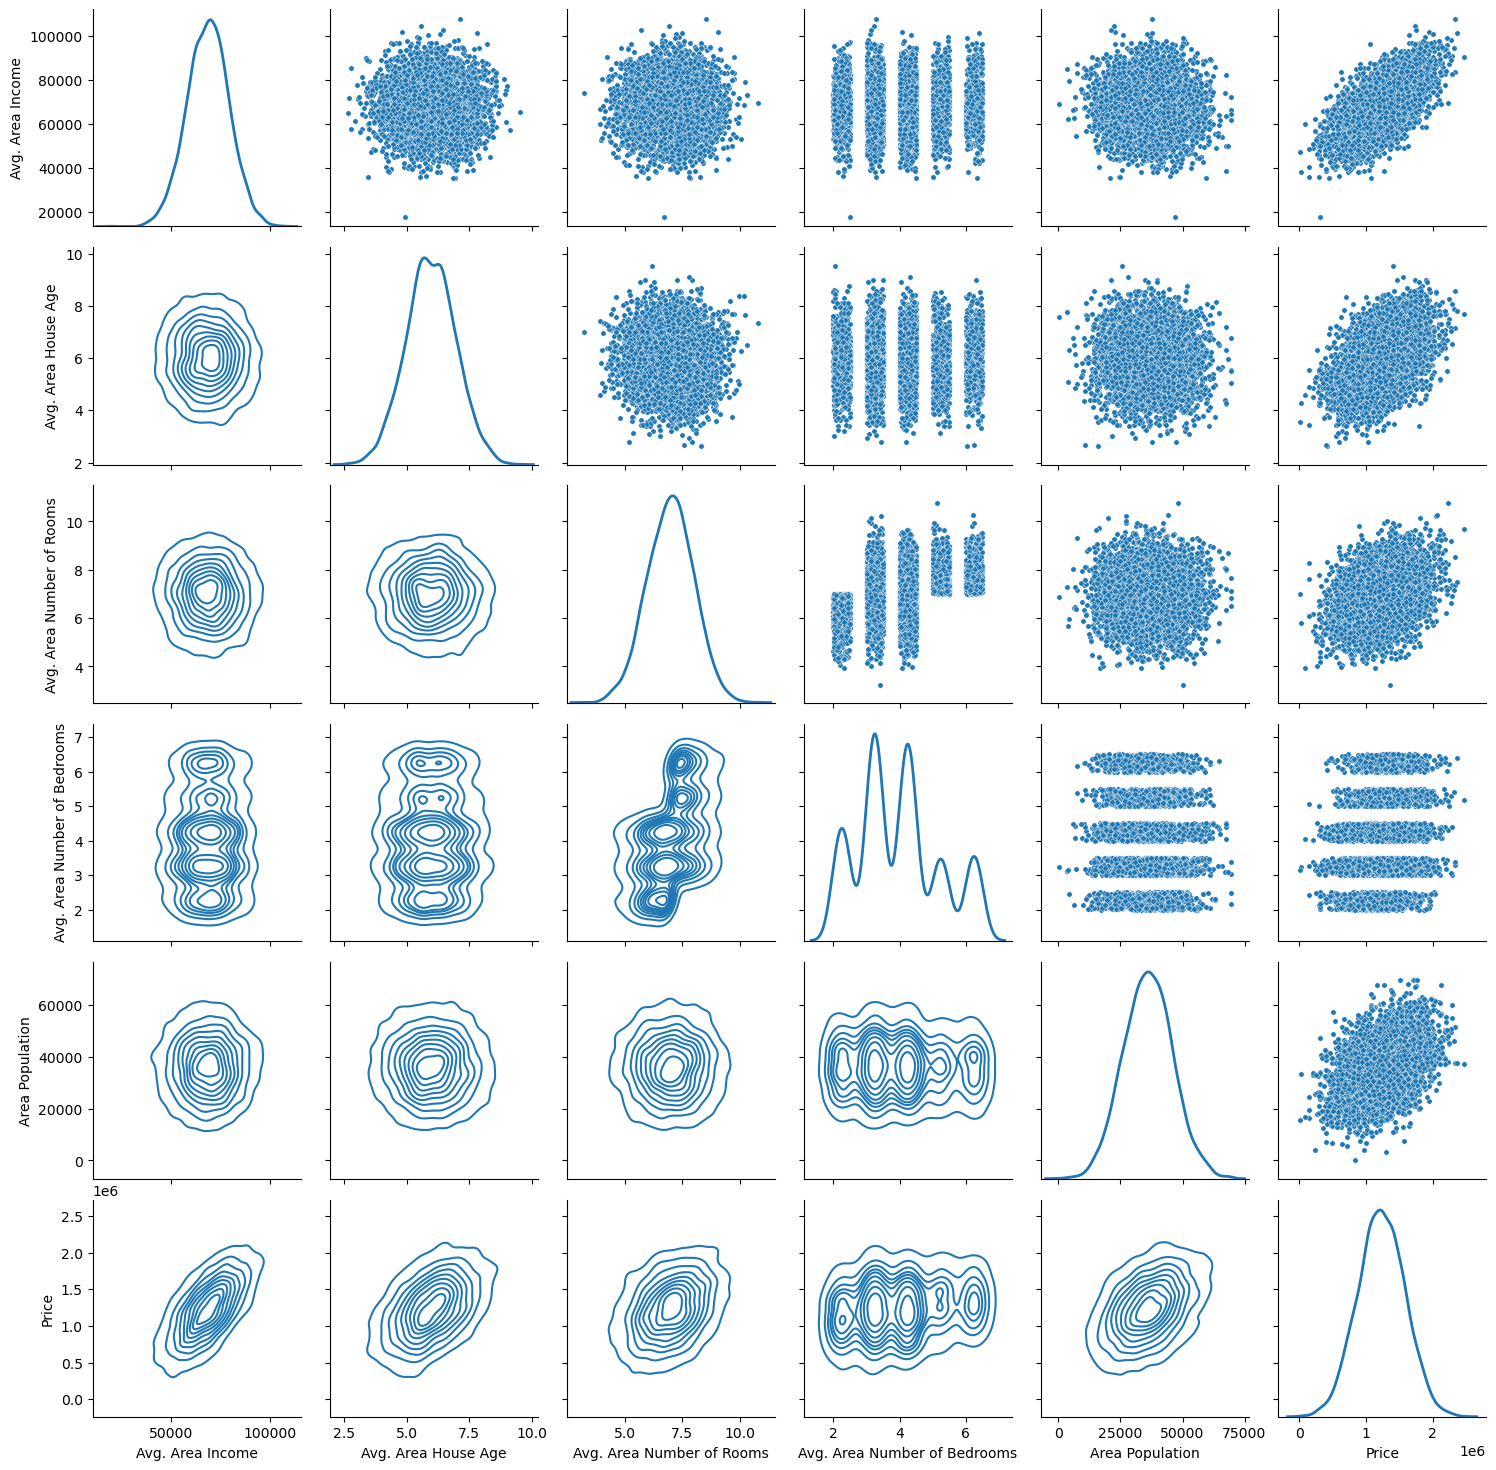

In [12]:
g = sns.PairGrid(usa_housing, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

We can see that the majority of all the variables are normally distributed however “Avg. Area Number of Bedrooms” has varying degrees of distributions and probabilities. As for the scatterplots on the right-hand side, all variables seem to show a positive linear trend with the exception of “Avg. Area Number of Bedrooms”. Hence, the number of bedrooms may not positively contribute to the results.

### Let’s also look at some sample statistics:

In [13]:
usa_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


We have a sufficient number of samples with the same size. This could be one of the reasons as to why our variables are normally distributed, tying in with the Central Limit Theorem.

Also, the majority 50% in:

- “Average Area Income” have incomes between $75,783.34 and $61,480.56.
- “Average House Age” are between 6.65 and 5.32 years old.
- “Average Number of Rooms” is between 7.67 and 6.30 rooms
- “Average Area: Number of Bedrooms” have 4.49 and 3.14 bedrooms
- “Area Population” is 42861.29 and 29403.93 people
- “Price” lies between $1,417,210 and $997,577

## Finally, let’s check for null values:

In [14]:
usa_housing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Thankfully, we don't have any.

Thus, we can conclude that all variables are normally distributed and correlated with the exception of the number of bedrooms, devoid of null values.

Now that we have some understanding behind the data, let’s begin wrangling our data to obtain the right predictor and response variables. We’ll also convert their data types as integers:

In [15]:
#Get X and Y targets
x = usa_housing.loc[:,'Avg. Area Income':'Area Population']
x = x.astype(int)

y = usa_housing.loc[:,'Price']
y = y.astype(int)

Shortly after, we’ll split the data into a training and testing set and begin model fitting:

In [16]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Initialize regressor
regressor = LinearRegression()

#Begin fitting the training sets
regressor.fit(X_train, y_train)

LinearRegression()

Let’s have a look at the model’s performance:

In [17]:
#Find the score R2-score for both training and test sets
regressor.score(X_train, y_train)
regressor.score(X_test, y_test)

0.8902848199906943

The model showed an R2-score of 89.396% for the training sets and 89.028% for the test set. This indicates that are our model shows strong linear relationships and tendencies between our response and predictor variables. Let’s also have a look at the RMSE as well as a visualization of our predictions:

In [18]:
predicted = regressor.predict(X_test)

In [19]:
#find RMSE 
print(np.sqrt(mean_squared_error(y_test, predicted)))

114729.22053996657


The RMSE of our model was 114729.221 indicating that our residuals are spread out to a significant extent from the line of best fit, indicating that there’s less concentration of residuals surrounding it. Keep in mind however that RMSE is scale-dependent and there is not a specific threshold for which is good or bad, but as a rule of thumb … smaller is better.

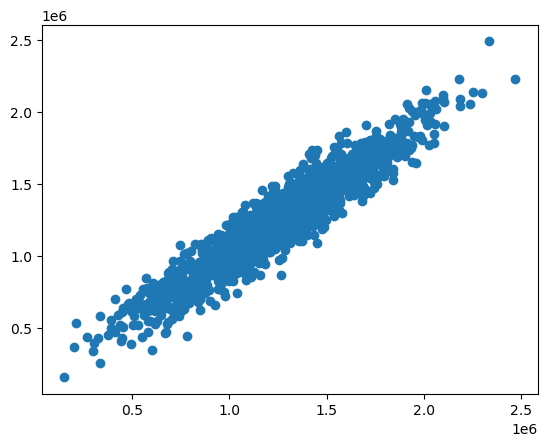

In [20]:
#Scatterplot of testing set
predicted = regressor.predict(X_test)
plt.scatter(y_test, predicted)

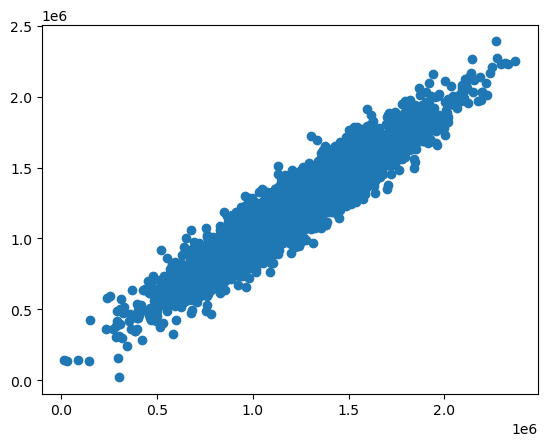

In [21]:
#scatterplot of training set
predicted = regressor.predict(X_train)
plt.scatter(y_train, predicted)

As for the plots, the predictions vs the true values show strong, positive and linear relationships with a good sign of correlation hence explained by the R2 score earlier.

Overall, a decent model to say the least, but we could improve it in the long run. For now, let’s begin deploying this in Flask, the focal point of this project.

Firstly, we need to save our model. Using the pickle library, we’ll use the following script to save our regression model:

In [22]:
#Save model
pickle.dump(regressor, open('model.pkl', 'wb'))